In [13]:
!pip install bs4

In [14]:
!pip install tabulate
!pip install matplotlib
!pip install numpy

In [0]:
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [0]:
extract_contents = lambda row: [x.text.replace('\n','') for x in row]
URL = 'https://www.mohfw.gov.in/'

SHORT_HEADERS = ['SNo', 'State','Indian-Confirmed','Foreign-Confirmed','Cured','Death'] 

In [0]:
response = requests.get(URL).content
soup = BeautifulSoup(response, 'html.parser')
header = extract_contents(soup.tr.find_all('th'))


In [0]:
stats = []
all_rows = soup.find_all('tr')

for row in all_rows:
  stat = extract_contents(row.find_all('td'))
  if stat:
    if len(stat) == 5:
      stat = ['', *stat]
      stats.append(stat)
    elif len(stat) == 6:
      stats.append(stat)

stats[-1][1] = 'TOtal cases' 
stats.remove(stats[-1])     


In [25]:
object = []
for row in stats:
  object.append(row[1])

y_pos = np.arange(len(object))

performance= []
for row in stats:
  performance.append(int(row[2]) +int(row[3]))


table = tabulate(states , headers=SHORT_HEADERS)
print(table)  

SNo    State    Indian-Confirmed    Foreign-Confirmed    Cured    Death
-----  -------  ------------------  -------------------  -------  -------


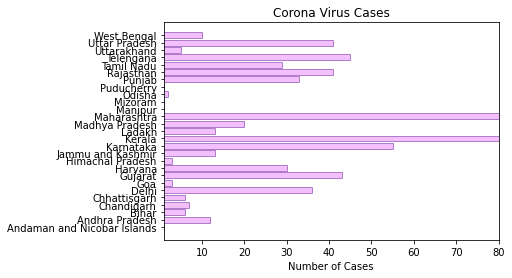

In [28]:
plt.barh(y_pos, performance, align='center', alpha=0.5, 
                 color=(234/256.0, 128/256.0, 252/256.0), 
                 edgecolor=(106/256.0, 27/256.0, 154/256.0)) 
  
plt.yticks(y_pos, object) 
plt.xlim(1,80) 
plt.xlabel('Number of Cases') 
plt.title('Corona Virus Cases') 
plt.show() 
